**Part 1 ‐ Exploratory data analysis**

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')
plt.figure(figsize=(15,10))
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

<Figure size 1080x720 with 0 Axes>

In [2]:
df1 = pd.read_json('/Users/amrita/Downloads/ultimate_challenge 2/logins.json')

In [3]:
df1.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [4]:
df1

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [5]:
df1.set_index('login_time', inplace=True)
df1['count'] = 1

In [6]:
df1 = df1.resample('15T').sum()
df1.head(10)

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
1970-01-01 21:15:00,4
1970-01-01 21:30:00,0
1970-01-01 21:45:00,4
1970-01-01 22:00:00,9


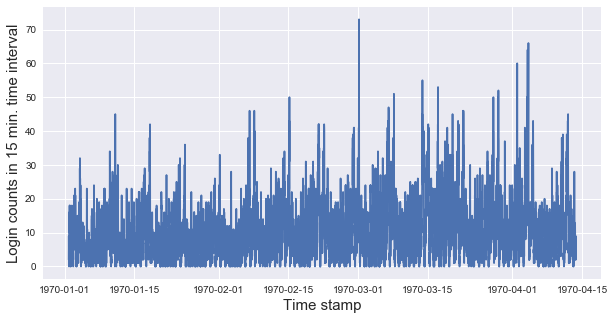

In [7]:
plt.figure(figsize=(10,5))
plt.plot(df1)
plt.xlabel('Time stamp',fontsize=15)
plt.ylabel('Login counts in 15 min. time interval', fontsize=15)
plt.show()

In [8]:
# checking if there are any missing data
df1.isnull().sum()

count    0
dtype: int64

In [9]:
df1.reset_index(drop=False, inplace=True)
df1['month']= pd.to_datetime(df1['login_time'],errors= 'coerce').dt.month

In [10]:
df1

,login_time,count,month
0,1970-01-01 20:00:00,2,1
1,1970-01-01 20:15:00,6,1
2,1970-01-01 20:30:00,9,1
3,1970-01-01 20:45:00,7,1
4,1970-01-01 21:00:00,1,1
...,...,...,...
9783,1970-04-13 17:45:00,5,4
9784,1970-04-13 18:00:00,5,4
9785,1970-04-13 18:15:00,2,4
9786,1970-04-13 18:30:00,7,4


In [11]:
january_df = df1[df1['month']==1]
february_df = df1[df1['month']==2]
march_df = df1[df1['month']==3]
april_df = df1[df1['month']==4]

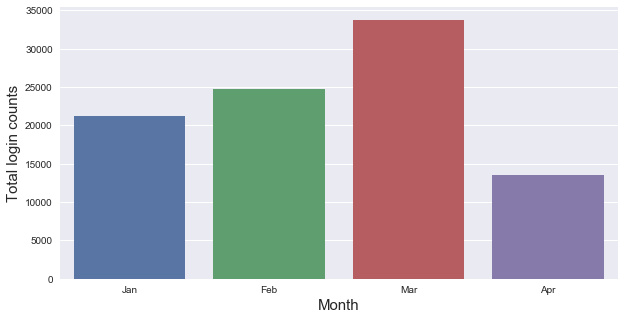

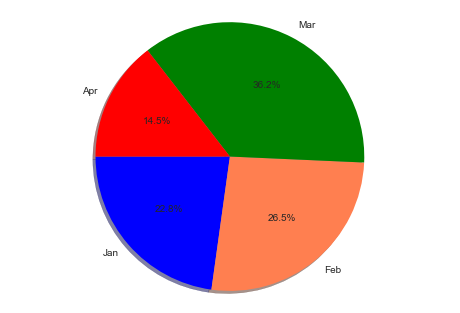

In [12]:
#Total login counts:

jan=january_df['count'].sum()
feb = february_df['count'].sum()
mar= march_df['count'].sum()
apr=april_df['count'].sum()


plt.figure(figsize=(10,5))
x=['Jan','Feb','Mar','Apr']
y=[jan,feb,mar,apr]
_=sns.barplot(x,y)
plt.xlabel('Month',fontsize=15)
plt.ylabel('Total login counts',fontsize=15)

plt.show()

#Pieplot:
labels = x
sizes = y
colors = ('b','coral','g','r')
explode = (0.00, 0,0,0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
#plt.savefig("5a.png")
plt.show()

In [13]:
january_df['dayofweek']= pd.to_datetime(january_df['login_time'],errors= 'coerce').dt.dayofweek
february_df['dayofweek']= pd.to_datetime(february_df['login_time'],errors= 'coerce').dt.dayofweek
march_df['dayofweek']= pd.to_datetime(march_df['login_time'],errors= 'coerce').dt.dayofweek
april_df['dayofweek']= pd.to_datetime(april_df['login_time'],errors= 'coerce').dt.dayofweek

/Users/amrita/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/amrita/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/amrita/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

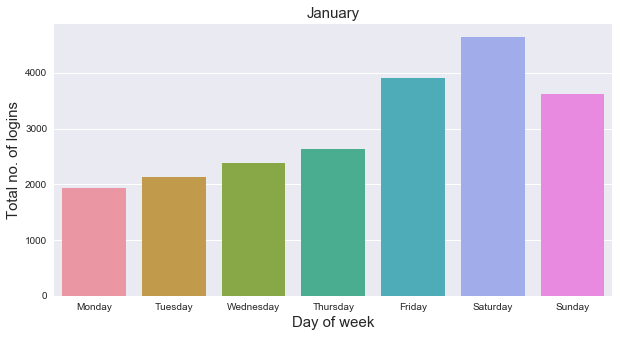

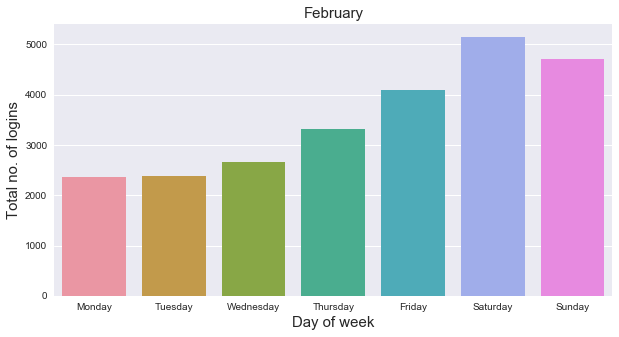

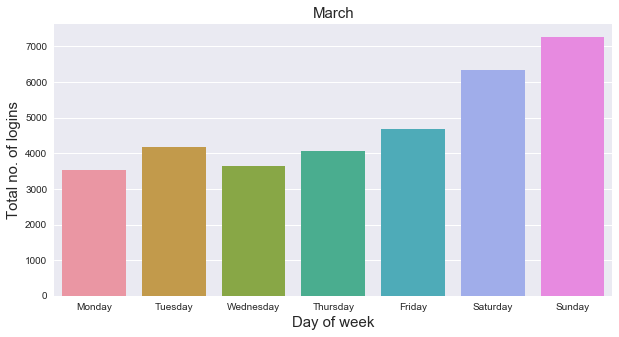

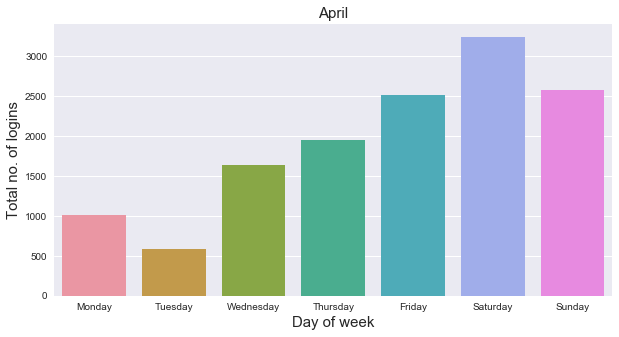

In [14]:
jan_day_count=january_df.groupby('dayofweek')['count'].sum()
feb_day_count=february_df.groupby('dayofweek')['count'].sum()
mar_day_count=march_df.groupby('dayofweek')['count'].sum()
apr_day_count=april_df.groupby('dayofweek')['count'].sum()


plt.figure(figsize=(10,5))
_=sns.barplot(jan_day_count.index,jan_day_count.values)
plt.xticks([0, 1, 2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.xlabel('Day of week',fontsize=15)
plt.ylabel('Total no. of logins',fontsize=15)
plt.title('January',fontsize=15)
plt.show()



plt.figure(figsize=(10,5))
_=sns.barplot(feb_day_count.index,feb_day_count.values)
plt.xticks([0, 1, 2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.xlabel('Day of week',fontsize=15)
plt.ylabel('Total no. of logins',fontsize=15)
plt.title('February',fontsize=15)
plt.show()


plt.figure(figsize=(10,5))
_=sns.barplot(mar_day_count.index,mar_day_count.values)
plt.xticks([0, 1, 2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.xlabel('Day of week',fontsize=15)
plt.ylabel('Total no. of logins',fontsize=15)
plt.title('March',fontsize=15)
plt.show()

plt.figure(figsize=(10,5))
_=sns.barplot(apr_day_count.index,apr_day_count.values)
plt.xticks([0, 1, 2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.xlabel('Day of week',fontsize=15)
plt.ylabel('Total no. of logins',fontsize=15)
plt.title('April',fontsize=15)
plt.show()

We observe different trends in the data. For all the months weekends have the maximum number of logins. Among all the months, March has the maximum number of logins. 

**Part 2 ‐ Experiment and metrics design**

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a) how you will implement the experiment
b) what statistical test(s) you will conduct to verify the significance of the observation
c) how you would interpret the results and provide recommendations to the city operations team along with any caveats.

**Part 3 ‐ Predictive modeling**


Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).


***Data description***

● city: city this user signed up in
● phone: primary device for this user
● signup_date: date of account registration; in the form ‘YYYYMMDD’
● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’
● avg_dist: the average distance in miles per trip taken in the first 30 days after signup
● avg_rating_by_driver: the rider’s average rating over all of their trips
● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
● surge_pct: the percent of trips taken with surge multiplier > 1
● avg_surge: The average surge multiplier over all of this user’s trips
● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
● weekday_pct: the percent of the user’s trips occurring during a weekday

In [15]:
df2 = pd.read_json('/Users/amrita/Desktop/Springboard/ultimate_data_challenge.json')

In [16]:
df2.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [17]:
df2.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [18]:
df2.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [19]:
df2 = df2.replace(r'^\s*$', np.NaN, regex=True)

In [20]:
df2.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [21]:
percent_missing = df2.isnull().sum() * 100 / len(df2)
missing_value_df = pd.DataFrame({'column_name': df2.columns,
                                 'percent_missing': percent_missing})

In [22]:
missing_value_df

,column_name,percent_missing
city,city,0.000
trips_in_first_30_days,trips_in_first_30_days,0.000
signup_date,signup_date,0.000
avg_rating_of_driver,avg_rating_of_driver,16.244
avg_surge,avg_surge,0.000
last_trip_date,last_trip_date,0.000
phone,phone,0.792
surge_pct,surge_pct,0.000
ultimate_black_user,ultimate_black_user,0.000
weekday_pct,weekday_pct,0.000


***As none of the explanatory variables contain more than 30% missing values, I decide not to drop any of the explanatory variables.***

In [23]:

df2[['last_trip_date','signup_date']].describe()

,last_trip_date,signup_date
count,50000,50000
unique,182,31
top,2014-06-29,2014-01-18
freq,2036,2948


In [24]:
df2.last_trip_date.describe()

count          50000
unique           182
top       2014-06-29
freq            2036
Name: last_trip_date, dtype: object

In [25]:
retained_users = []
for i in range(len(df2)):
    st = pd.Timestamp(df2['signup_date'][i]) #get start date
    et = st + pd.Timedelta('181D') #6 months later
    at = et - pd.Timedelta('30D') #set point 30 days prior
    if at <= pd.Timestamp(df2['last_trip_date'][i]) <= et:
        retained_users.append([1]) # now that the active condition has been met, set active user to 1
    else:
        retained_users.append([0])

In [26]:
new_df = pd.DataFrame(retained_users,columns = ['retained_users'])

In [27]:
final_data= pd.concat([df2, new_df], axis = 1)

In [28]:
final_data

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained_users
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,0
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,0


In [29]:
# Table of ultimate balck vs active
ub_active = pd.crosstab(index=final_data["retained_users"], 
                            columns=final_data["ultimate_black_user"],
                             margins=True)   # Include row and column totals

ub_active.columns = ["Not Ultimate Black","Is Ultimate Black","rowtotal"]
ub_active.index= ["Not Active","Is Active","coltotal"]

ub_active

,Not Ultimate Black,Is Ultimate Black,rowtotal
Not Active,25204,12598,37802
Is Active,5942,6256,12198
coltotal,31146,18854,50000


In [63]:
#transforming categorical features into numerical for predictive modeling
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(["King's Landing", 'Astapor', 'Winterfell'])
LE = preprocessing.LabelEncoder()
LE.fit(['iPhone','Android'])

LabelEncoder()

In [64]:
df_drop = final_data.dropna()
df_drop['retained_users'].value_counts()

0    30209
1    11236
Name: retained_users, dtype: int64

In [65]:
df_drop['city']

0        King's Landing
1               Astapor
2               Astapor
3        King's Landing
4            Winterfell
              ...      
49993           Astapor
49994           Astapor
49995    King's Landing
49997        Winterfell
49998           Astapor
Name: city, Length: 41445, dtype: object

In [66]:
df_drop['phone'].unique()

array(['iPhone', 'Android'], dtype=object)

In [76]:
df_drop['ultimate_black_user'].unique()

array([ True, False])

In [67]:
creation1 = le.transform(df_drop['city']) #transform the categorical data into number labels
creation2 = LE.transform(df_drop['phone'])

In [68]:
df2 = pd.DataFrame(creation1,columns = ['city#']) # add them to the dataframe
df3 = pd.DataFrame(creation2, columns = ['phone#'])

In [69]:
df_new = pd.concat([df_drop,df2,df3],axis =1 )

In [70]:
df_new

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained_users,city#,phone#
0,King's Landing,4.0,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,0.0,1.0,1.0
1,Astapor,0.0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0.0,0.0,0.0
2,Astapor,3.0,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0.0,0.0,1.0
3,King's Landing,9.0,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1.0,1.0,1.0
4,Winterfell,14.0,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,Astapor,3.0,2014-01-03,4.8,1.11,2014-07-01,iPhone,11.1,True,55.6,2.53,4.7,1.0,NaN,NaN
49994,Astapor,1.0,2014-01-03,4.6,1.44,2014-05-31,iPhone,37.5,False,25.0,2.25,4.5,0.0,NaN,NaN
49995,King's Landing,0.0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,0.0,NaN,NaN
49997,Winterfell,0.0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,0.0,NaN,NaN


In [72]:
df_new = df_new.drop(['city','phone'], axis=1)

In [73]:
df_new = df_new.dropna()

In [74]:
df_new["ultimate_black_user"] = df_new["ultimate_black_user"].astype(int)

In [75]:
df_new

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained_users,city#,phone#
0,4.0,2014-01-25,4.7,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,0.0,1.0,1.0
1,0.0,2014-01-29,5.0,1.00,2014-05-05,0.0,0,50.0,8.26,5.0,0.0,0.0,0.0
2,3.0,2014-01-06,4.3,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,0.0,0.0,1.0
3,9.0,2014-01-10,4.6,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,1.0,1.0,1.0
4,14.0,2014-01-27,4.4,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41439,2.0,2014-01-23,4.0,1.00,2014-06-09,0.0,1,0.0,1.47,5.0,0.0,1.0,1.0
41440,2.0,2014-01-20,5.0,1.10,2014-06-22,13.3,0,26.7,2.21,4.7,1.0,0.0,1.0
41441,1.0,2014-01-01,4.0,1.00,2014-03-02,0.0,1,50.0,2.77,5.0,0.0,0.0,1.0
41442,1.0,2014-01-07,5.0,1.00,2014-02-11,0.0,0,50.0,4.84,4.8,0.0,1.0,1.0


In [77]:
y = df_new['retained_users']
X = df_new[['avg_dist', 'avg_rating_by_driver','trips_in_first_30_days', 'city#', 'phone#','ultimate_black_user']]

In [78]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[9740  216]
 [3457  334]]
              precision    recall  f1-score   support

         0.0       0.74      0.98      0.84      9956
         1.0       0.61      0.09      0.15      3791

    accuracy                           0.73     13747
   macro avg       0.67      0.53      0.50     13747
weighted avg       0.70      0.73      0.65     13747



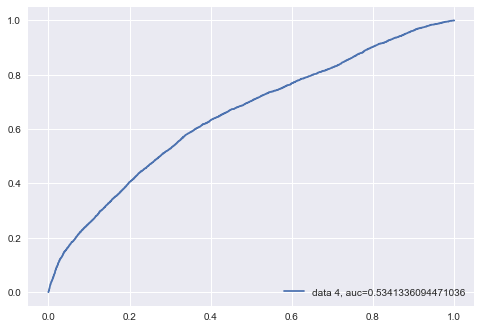

In [82]:
# AUC (training)

from sklearn import metrics

y_pred_newseed1=logreg.predict(X_train)

y_pred_proba_newseed1 = logreg.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba_newseed1)
auc_newseed1 = metrics.roc_auc_score(y_train, y_pred_newseed1)
plt.plot(fpr,tpr,label="data 4, auc="+str(auc_newseed1))
plt.legend(loc=4)
plt.show()

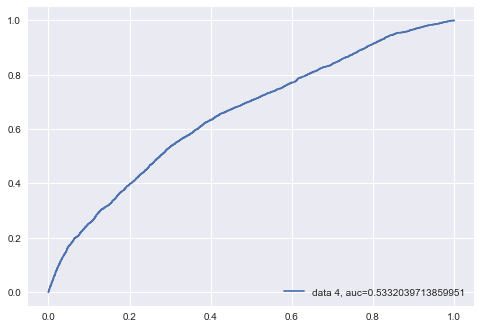

In [83]:
# AUC

from sklearn import metrics

y_pred_proba_newseed = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_newseed)
auc_newseed = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 4, auc="+str(auc_newseed))
plt.legend(loc=4)
plt.show()

In [84]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv = 5,scoring = 'roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))


AUC: 0.6550292799793638
AUC scores computed using 5-fold cross-validation: [0.65237682 0.65423354 0.65196134 0.65807703 0.65325863]


In [85]:
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 3.727593720314938}
Best score is 0.7371897158560814


# XGBoost

In [86]:
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [87]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
# fit model to training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier()

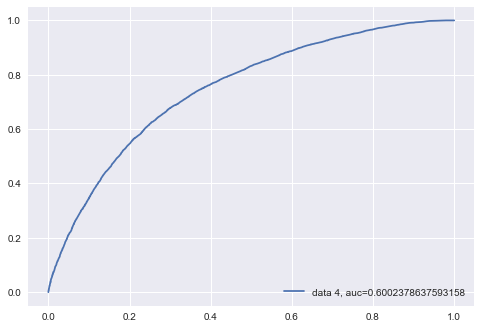

In [89]:
# AUC (training)

from sklearn import metrics

y_pred_gb1=model.predict(X_train)

y_pred_proba_gb1 = model.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba_gb1)
auc_newseed_gb1 = metrics.roc_auc_score(y_train, y_pred_gb1)
plt.plot(fpr,tpr,label="data 4, auc="+str(auc_newseed_gb1))
plt.legend(loc=4)
plt.show()

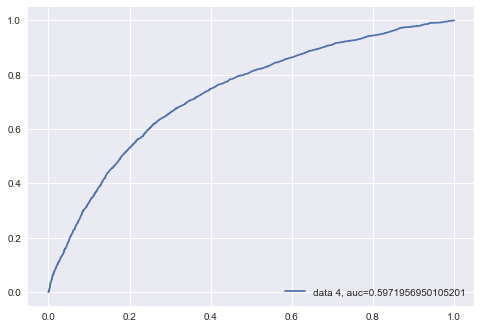

In [90]:
# AUC (test)

ypred2 = model.predict(X_test)

y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, ypred2)
plt.plot(fpr,tpr,label="data 4, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Text(0, 0.5, 'Feature Importance Score')

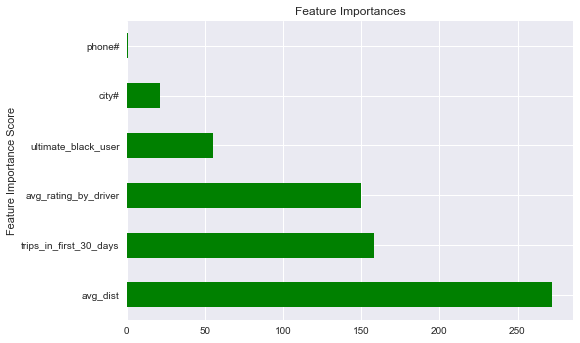

In [88]:
feat_imp = pd.Series(model.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='barh', color = 'g', title='Feature Importances')
plt.ylabel('Feature Importance Score')